# Fake News Detection

## Importing required library

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import re
import string
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics as m
import itertools
from sklearn.metrics import plot_confusion_matrix

In [2]:
df_fake = pd.read_csv("Fake.csv")
df_true = pd.read_csv("True.csv")

In [3]:
df_fake["class"] = 0
df_true["class"] = 1

In [4]:
df_fake

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [5]:
df_true

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [6]:
df_fake.shape, df_true.shape

((23481, 5), (21417, 5))

## Merging Fake news and true news

In [7]:
df = pd.concat([df_fake, df_true], axis =0 )
df

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [8]:
df.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [9]:
df = df.drop(["title", "subject","date"], axis = 1)

In [10]:
df

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
...,...,...
21412,BRUSSELS (Reuters) - NATO allies on Tuesday we...,1
21413,"LONDON (Reuters) - LexisNexis, a provider of l...",1
21414,MINSK (Reuters) - In the shadow of disused Sov...,1
21415,MOSCOW (Reuters) - Vatican Secretary of State ...,1


## Randomly shuffling the df

In [12]:
df = df.sample(frac = 1)

In [13]:
df

,text,class
12124,https://www.youtube.com/watch?v=I zihjmn0M,0
22790,Tune in to the Alternate Current Radio Network...,0
1780,WASHINGTON (Reuters) - The U.S. Marshals Servi...,1
15879,THE CONGRESS IS THERE TO DO WHAT S BEST FOR TH...,0
10684,NEW YORK/LONDON (Reuters) - Donald Trump’s cha...,1
...,...,...
17675,"One year later, and Donald Trump s supporters ...",0
19621,"NAYPYITAW, Myanmar/UNITED NATIONS (Reuters) - ...",1
1612,WASHINGTON (Reuters) - Republican leaders soug...,1
16952,"MANILA (Reuters) - Three Russian warships, inc...",1


## Check Duplicates

In [14]:
df.drop_duplicates(inplace = True)

#New shape of the df
df.shape

(38647, 2)

## Checking Missing values


In [15]:
# Check for Missing data (NAN,na,NaN) for each column
df.isnull().sum()

text     0
class    0
dtype: int64

## Reset the index

In [16]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

In [17]:
df

,text,class
0,https://www.youtube.com/watch?v=I zihjmn0M,0
1,Tune in to the Alternate Current Radio Network...,0
2,WASHINGTON (Reuters) - The U.S. Marshals Servi...,1
3,THE CONGRESS IS THERE TO DO WHAT S BEST FOR TH...,0
4,NEW YORK/LONDON (Reuters) - Donald Trump’s cha...,1
...,...,...
38642,This madness needs to stop and that means Dona...,0
38643,"NAYPYITAW, Myanmar/UNITED NATIONS (Reuters) - ...",1
38644,WASHINGTON (Reuters) - Republican leaders soug...,1
38645,"MANILA (Reuters) - Three Russian warships, inc...",1


Number of Fake news :  17455
Number of True news  :  21192


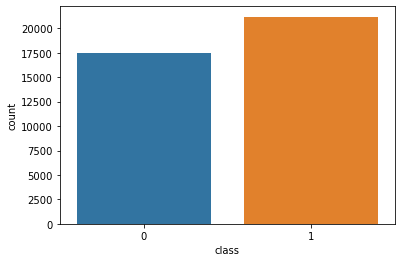

In [18]:
print("Number of Fake news : " ,df[df['class'] == 0].shape[0])
print("Number of True news  : ",df[df['class'] == 1].shape[0])


sns.countplot(x = 'class' , data = df)
plt.show()

## Creating a function to convert the text in lowercase, remove the extra space, special chr., ulr and links.

In [19]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [20]:
df["text"] = df["text"].apply(wordopt)

In [21]:
df

,text,class
0,https www youtube com watch v i,0
1,tune in to the alternate current radio network...,0
2,washington reuters the u s marshals servi...,1
3,the congress is there to do what s best for th...,0
4,new york london reuters donald trump s cha...,1
...,...,...
38642,this madness needs to stop and that means dona...,0
38643,naypyitaw myanmar united nations reuters ...,1
38644,washington reuters republican leaders soug...,1
38645,manila reuters three russian warships inc...,1


### Defining dependent and independent variable as x and y

In [22]:
x = df["text"]
y = df["class"]

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [24]:
print(x_train.shape)
print(y_train.shape)

(28985,)
(28985,)


In [25]:
print(x_test.shape)
print(y_test.shape)

(9662,)
(9662,)


## Converting text to vectors

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [27]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [28]:
print(type(xv_test))

<class 'scipy.sparse.csr.csr_matrix'>


In [29]:
print(xv_test.shape)

(9662, 92753)


In [30]:
xv_test

<9662x92753 sparse matrix of type '<class 'numpy.float64'>'
	with 1976236 stored elements in Compressed Sparse Row format>

## Confusion Matrix


In [31]:
def confusion_mat(Y_test, pred):
    TN = 0
    TP=0
    FN=0
    FP=0
    

    for i in range(len(Y_test)):
        
        if pred[i] == 0 and Y_test[i] == 0:
            TN=TN+1
        elif pred[i] == 1 and Y_test[i] == 1:
            TP=TP+1
        elif pred[i] == 1 and Y_test[i] == 0:
            FP=FP+1
        else:
            FN=FN+1
    
    return TN,TP,FN,FP

In [32]:
def accuracy_score(TN,TP,FN,FP):
    total = TN+TP+FN+FP
    return (TN+TP)/total


def precision_score(TN,TP,FN,FP):
    return TP/(TP+FP)


def recall_score(TN,TP,FN,FP):
    return TP/(TP+FN)


def f0pt5_score(TN,TP,FN,FP):
    p = TP/(TP+FP)
    r = TP/(TP+FN)
    return  5*p*r/(p+r)

## Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [35]:
pred_lr=LR.predict(xv_test)

In [36]:
accuracy = m.accuracy_score(y_test, pred_lr)
accuracy

0.9865452287311116

In [37]:
#CONFUSION MATRIX
TN,TP,FN,FP = confusion_mat(y_test.to_numpy(), pred_lr)

print("TN ", TN)
print("FP ", FP)
print("FN ", FN)
print("TP ", TP)

TN  4309
FP  80
FN  50
TP  5223


In [38]:
print("ACCURACY   : ",accuracy_score(TN,TP,FN,FP))
print("PRECISION  : ",precision_score(TN,TP,FN,FP))
print("RECALL     : ",recall_score(TN,TP,FN,FP))
print("F0.5_SCORE : ",f0pt5_score(TN,TP,FN,FP))

ACCURACY   :  0.9865452287311116
PRECISION  :  0.9849141995097115
RECALL     :  0.9905177318414565
F0.5_SCORE :  2.469270045385779


In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred_lr)

array([[4309,   80],
       [  50, 5223]], dtype=int64)

In [40]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4389
           1       0.98      0.99      0.99      5273

    accuracy                           0.99      9662
   macro avg       0.99      0.99      0.99      9662
weighted avg       0.99      0.99      0.99      9662



## Naive Bayes

In [41]:
from sklearn.naive_bayes import MultinomialNB

In [42]:
NB = MultinomialNB()
NB.fit(xv_train, y_train)

MultinomialNB()

In [43]:
pred_NB = NB.predict(xv_test)

In [44]:
accuracy = m.accuracy_score(y_test, pred_NB)
accuracy

0.938315048644173

In [47]:
#CONFUSION MATRIX
TN,TP,FN,FP = confusion_mat(y_test.to_numpy(), pred_NB)

print("True Negative ", TN)
print("False Positive ", FP)
print("False Negative ", FN)
print("True Positive ", TP)

True Negative  3990
False Positive  399
False Negative  197
True Positive  5076


In [48]:
print("ACCURACY   : ",accuracy_score(TN,TP,FN,FP))
print("PRECISION  : ",precision_score(TN,TP,FN,FP))
print("RECALL     : ",recall_score(TN,TP,FN,FP))
print("F0.5_SCORE : ",f0pt5_score(TN,TP,FN,FP))

ACCURACY   :  0.938315048644173
PRECISION  :  0.9271232876712329
RECALL     :  0.9626398634553385
F0.5_SCORE :  2.361369557126907


In [49]:
print(classification_report(y_test, pred_NB))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      4389
           1       0.93      0.96      0.94      5273

    accuracy                           0.94      9662
   macro avg       0.94      0.94      0.94      9662
weighted avg       0.94      0.94      0.94      9662



## Decision Tree Classification

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [48]:
pred_dt = DT.predict(xv_test)

In [93]:
accuracy = m.accuracy_score(y_test, pred_dt)
accuracy

0.9951355826950942

In [67]:
#CONFUSION MATRIX
TN,TP,FN,FP = confusion_mat(y_test.to_numpy(), pred_dt)

print("TN ", TN)
print("FP ", FP)
print("FN ", FN)
print("TP ", TP)

TN  4473
FP  23
FN  24
TP  5142


In [68]:
print("ACCURACY   : ",accuracy_score(TN,TP,FN,FP))
print("PRECISION  : ",precision_score(TN,TP,FN,FP))
print("RECALL     : ",recall_score(TN,TP,FN,FP))
print("F0.5_SCORE : ",f0pt5_score(TN,TP,FN,FP))

ACCURACY   :  0.9951355826950942
PRECISION  :  0.9955469506292353
RECALL     :  0.9953542392566783
F0.5_SCORE :  2.488626464040267


In [50]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4496
           1       1.00      1.00      1.00      5166

    accuracy                           1.00      9662
   macro avg       1.00      1.00      1.00      9662
weighted avg       1.00      1.00      1.00      9662



## Gradient Boosting Classifier

In [50]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train, y_train)

In [53]:
pred_gbc = GBC.predict(xv_test)

In [94]:
accuracy = m.accuracy_score(y_test, pred_gbc)
accuracy

0.9950320844545643

In [71]:
#CONFUSION MATRIX
TN,TP,FN,FP = confusion_mat(y_test.to_numpy(), pred_gbc)

print("TN ", TN)
print("FP ", FP)
print("FN ", FN)
print("TP ", TP)

TN  4459
FP  37
FN  11
TP  5155


In [72]:
print("ACCURACY   : ",accuracy_score(TN,TP,FN,FP))
print("PRECISION  : ",precision_score(TN,TP,FN,FP))
print("RECALL     : ",recall_score(TN,TP,FN,FP))
print("F0.5_SCORE : ",f0pt5_score(TN,TP,FN,FP))

ACCURACY   :  0.9950320844545643
PRECISION  :  0.9928736517719569
RECALL     :  0.9978706929926442
F0.5_SCORE :  2.4884147518826025


In [75]:
print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4496
           1       0.99      1.00      1.00      5166

    accuracy                           1.00      9662
   macro avg       1.00      0.99      1.00      9662
weighted avg       1.00      1.00      1.00      9662



## KNN


In [96]:
from sklearn.neighbors import KNeighborsClassifier

In [115]:
 knn = KNeighborsClassifier(n_neighbors=1)
 knn.fit(xv_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [116]:
pred_knn = knn.predict(xv_test)

In [117]:
accuracy = m.accuracy_score(y_test, pred_knn)
accuracy

0.7491202649554958

In [118]:
#CONFUSION MATRIX
TN,TP,FN,FP = confusion_mat(y_test.to_numpy(), pred_knn)

print("True Negative ", TN)
print("False Positive ", FP)
print("False Negative ", FN)
print("True Positive ", TP)

True Negative  4178
False Positive  318
False Negative  2106
True Positive  3060


In [113]:
print("ACCURACY   : ",accuracy_score(TN,TP,FN,FP))
print("PRECISION  : ",precision_score(TN,TP,FN,FP))
print("RECALL     : ",recall_score(TN,TP,FN,FP))
print("F0.5_SCORE : ",f0pt5_score(TN,TP,FN,FP))

ACCURACY   :  0.859242392879321
PRECISION  :  0.9317150635208712
RECALL     :  0.7950058072009292
F0.5_SCORE :  2.144871527052434


In [114]:
print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86      4496
           1       0.93      0.80      0.86      5166

    accuracy                           0.86      9662
   macro avg       0.87      0.86      0.86      9662
weighted avg       0.87      0.86      0.86      9662



## Finding K value

In [119]:
accuracy_rate = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xv_train, y_train) 
    accuracy_rate.append(m.accuracy_score(y_test, knn.predict(xv_test)))

In [ ]:
 plt.figure(figsize=(10,6))
 plt.plot(range(1,40), accuracy_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize =10)
 plt.title('accuracy rate vs K value')
 plt.xlabel('K')
 plt.ylabel('Error Rate')

## Random Forest Classifier

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [58]:
pred_rfc = RFC.predict(xv_test)

In [95]:
accuracy = m.accuracy_score(y_test, pred_rfc)
accuracy

0.9824052991099151

In [76]:
#CONFUSION MATRIX
TN,TP,FN,FP = confusion_mat(y_test.to_numpy(), pred_rfc)

print("TN ", TN)
print("FP ", FP)
print("FN ", FN)
print("TP ", TP)

TN  4385
FP  111
FN  59
TP  5107


In [77]:
print("ACCURACY   : ",accuracy_score(TN,TP,FN,FP))
print("PRECISION  : ",precision_score(TN,TP,FN,FP))
print("RECALL     : ",recall_score(TN,TP,FN,FP))
print("F0.5_SCORE : ",f0pt5_score(TN,TP,FN,FP))

ACCURACY   :  0.9824052991099151
PRECISION  :  0.9787274817937908
RECALL     :  0.9885791715060007
F0.5_SCORE :  2.459071648690293


In [60]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      4496
           1       0.98      0.99      0.98      5166

    accuracy                           0.98      9662
   macro avg       0.98      0.98      0.98      9662
weighted avg       0.98      0.98      0.98      9662

